In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob  # Para manejar múltiples archivos

# Configuración de seaborn para gráficos mas agradables
sns.set_theme(style="whitegrid")

In [50]:

files = glob.glob("stats-ej1-d/*.txt")

data_list = []

for file in files:
    with open(file, 'r') as f:
        cache = None
        vias = None
        metrics = {}
        
        for line in f:
            line = line.strip()

            if line.startswith("cache"):
                cache = line.split()[1]
            elif line.startswith("vias"):
                vias = line.split()[1]
            elif line:
                parts = line.split()
                if len(parts) == 2:
                    metric, value = parts
                    metrics[metric] = float(value)
        assert cache is not None
        assert vias is not None
        metrics['cache'] = cache
        metrics['vias'] = vias
        data_list.append(pd.DataFrame([metrics]))

data = pd.concat(data_list, ignore_index=True)


cache_order = ["8k", "16k", "32k"]
data['cache'] = pd.Categorical(data['cache'], categories=cache_order, ordered=True)


grouped_data = data.groupby(['cache', 'vias'], observed=True).mean()
grouped_data = grouped_data.sort_values(by=['cache', 'vias']).reset_index()

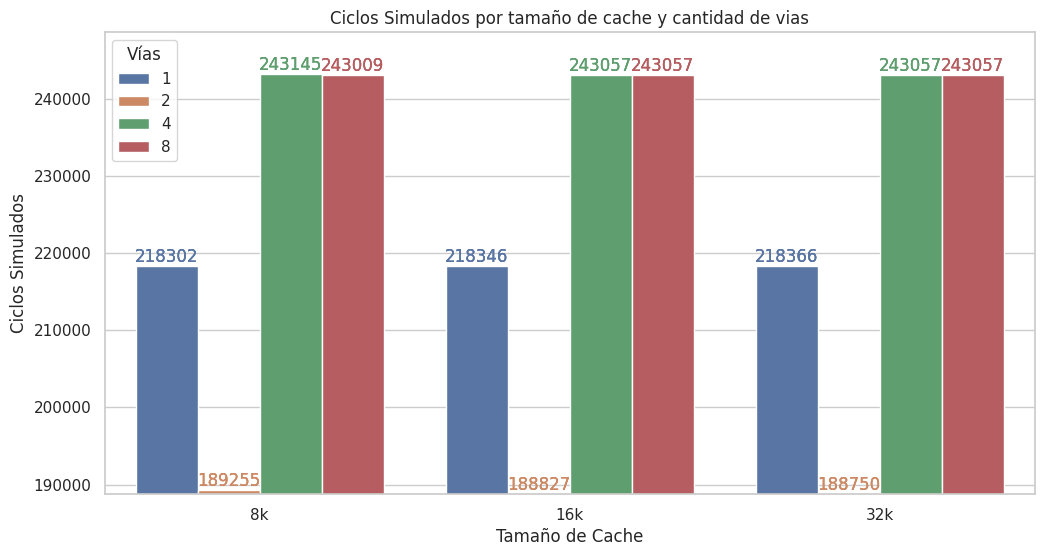

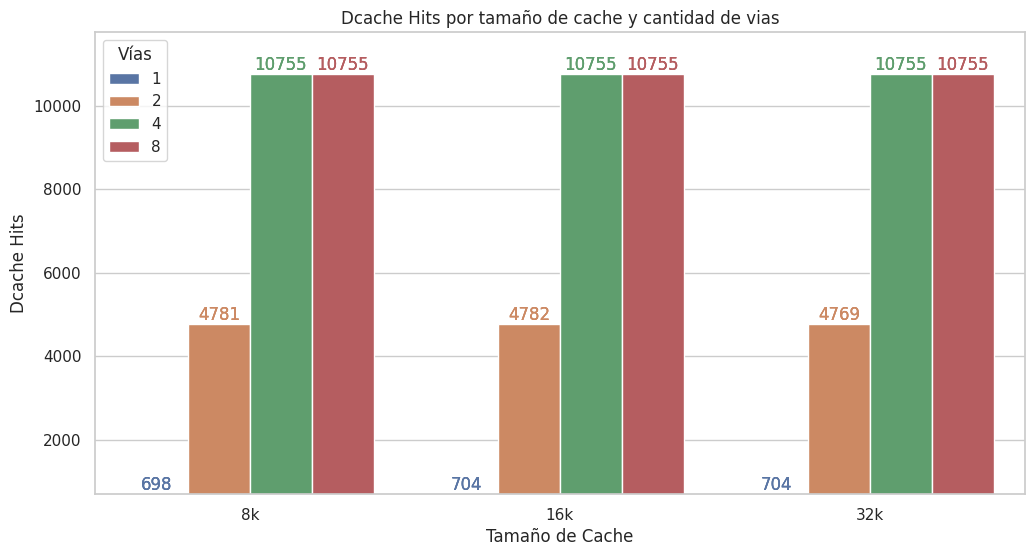

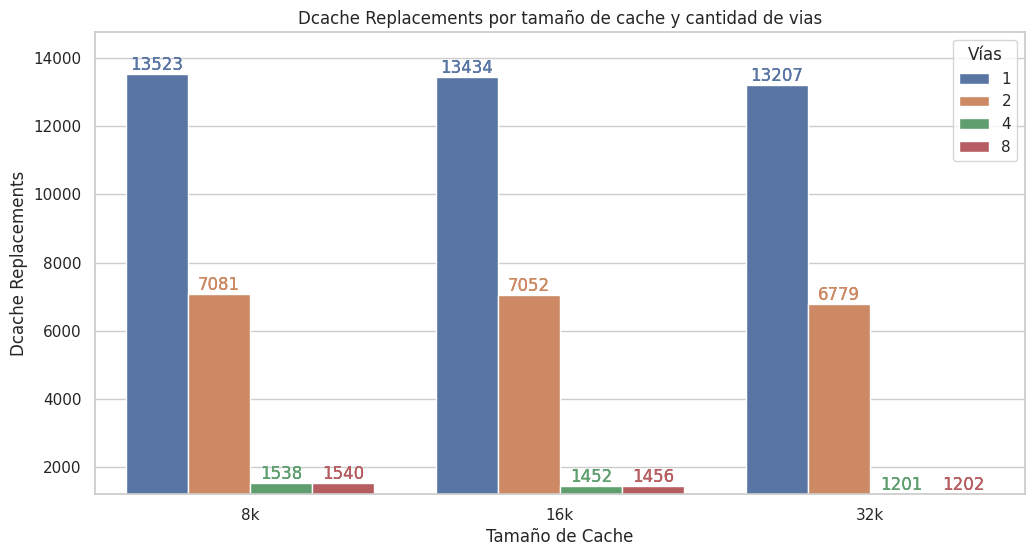

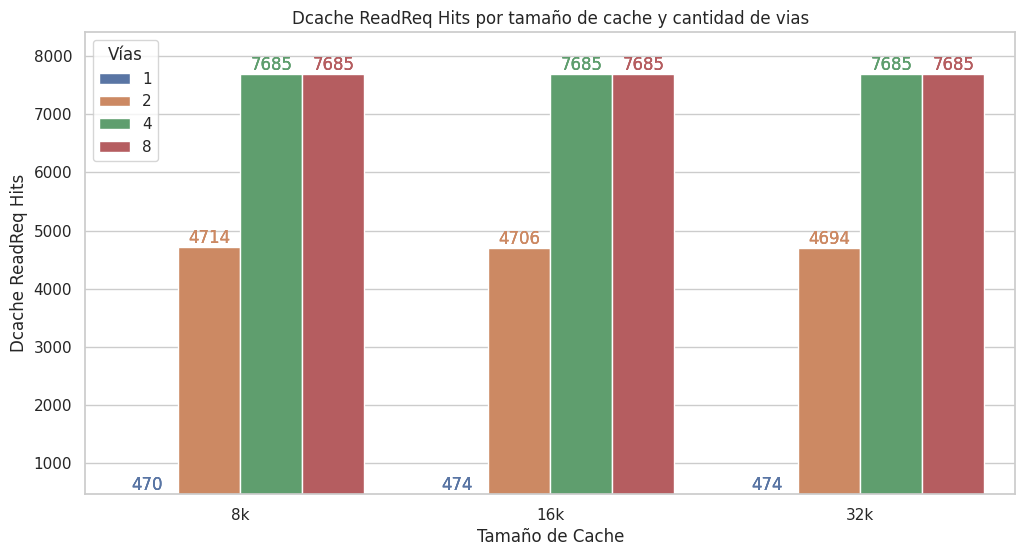

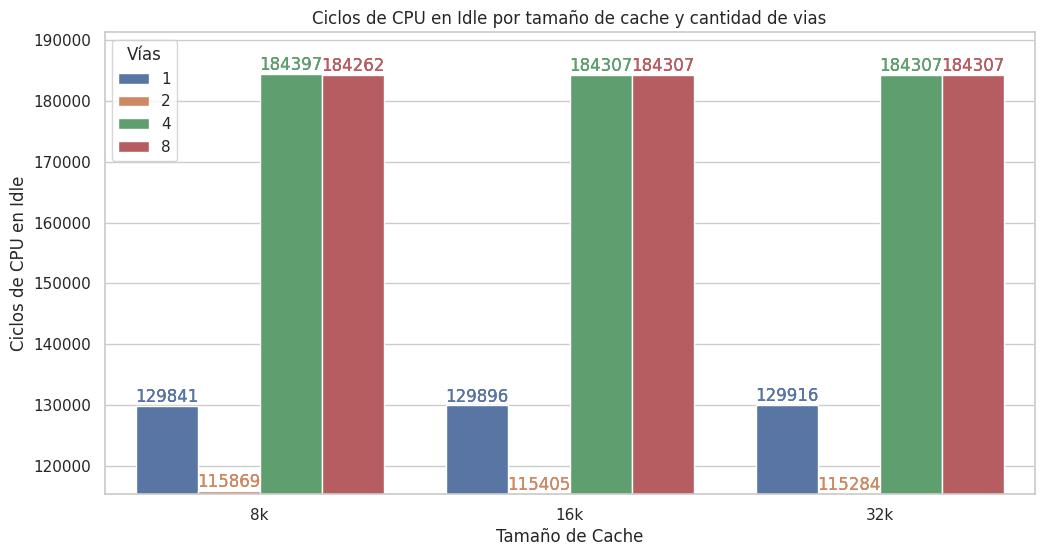

In [51]:
def generate_cache_barplot(y, alias, data):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=data, x='cache', y=y, hue='vias')
    
    ax.set_xlabel('Tamaño de Cache')
    ax.set_ylabel(alias)
    ax.set_title(alias + ' por tamaño de cache y cantidad de vias')
    ax.legend(title="Vías")

    lower_bound = data[y].min()
    upper_bound = data[y].max() + (data[y].max() - lower_bound) * 0.1
    ax.set_ybound(lower=lower_bound, upper=upper_bound)
    
    for container in ax.containers:
        for bar in container:
            color = bar.get_facecolor()
            ax.bar_label(container, fmt="%.0f", color=color)

    plt.show()
    
# Cpu
# generate_cache_barplot('simInsts', 'Instrucciones Simuladas', grouped_data)
generate_cache_barplot('system.cpu_cluster.cpus.numCycles', 'Ciclos Simulados', grouped_data)

# Branch predictor
# generate_cache_barplot('system.cpu_cluster.cpus.branchPred.lookups', 'BP Lookups', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.branchPred.condPredicted', 'BP Condicionales Predecidos', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.branchPred.condIncorrect', 'BP Condicionales Incorrectos', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.branchPred.BTBLookups', 'BTB Lookups', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.branchPred.BTBUpdates', 'BTB Updates', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.branchPred.BTBHits', 'BTB Hits', grouped_data)

# Instruction classes
# generate_cache_barplot('system.cpu_cluster.cpus.commitStats0.committedInstType::IntAlu', 'IntAlu', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.commitStats0.committedInstType::IntMult', 'IntMult', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.commitStats0.committedInstType::IntDiv', 'IntDiv', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.commitStats0.committedInstType::FloatAdd', 'FloatAdd', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.commitStats0.committedInstType::FloatCmp', 'FloatCmp', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.commitStats0.committedInstType::FloatCvt', 'FloatCvt', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.commitStats0.committedInstType::FloatMult', 'FloatMult', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.commitStats0.committedInstType::MemRead', 'MemRead', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.commitStats0.committedInstType::MemWrite', 'MemWrite', grouped_data)

# Dcache
generate_cache_barplot('system.cpu_cluster.cpus.dcache.overallHits::total', 'Dcache Hits', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.dcache.overallMisses::total', 'Dcache Misses', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.dcache.overallAccesses::total', 'Dcache Accesses', grouped_data)
generate_cache_barplot('system.cpu_cluster.cpus.dcache.replacements', 'Dcache Replacements', grouped_data)
generate_cache_barplot('system.cpu_cluster.cpus.dcache.ReadReq.hits::total', 'Dcache ReadReq Hits', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.dcache.ReadReq.accesses::total', 'Dcache ReadReq Accesses', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.dcache.WriteReq.hits::total', 'Dcache WriteReq Hits', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.dcache.WriteReq.accesses::total', 'Dcache WriteReq Accesses', grouped_data)

# Icache
# generate_cache_barplot('system.cpu_cluster.cpus.icache.overallHits::total', 'Icache Hits', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.icache.overallMisses::total', 'Icache Misses', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.icache.overallAccesses::total', 'Icache Accesses', grouped_data)
# generate_cache_barplot('system.cpu_cluster.cpus.icache.replacements', 'Icache Replacements', grouped_data)

# L2
# generate_cache_barplot('system.cpu_cluster.l2.overallMisses::total', 'L2 Misses', grouped_data)
# generate_cache_barplot('system.cpu_cluster.l2.overallAccesses::total', 'L2 Accesses', grouped_data)
# generate_cache_barplot('system.cpu_cluster.l2.replacements', 'L2 Replacements', grouped_data)

# Otros
generate_cache_barplot('system.cpu_cluster.cpus.idleCycles', 'Ciclos de CPU en Idle', grouped_data)
